<a href="https://colab.research.google.com/github/Nivratti/TextRecognitionDataGenerator/blob/master/text_recognition_data_generator_word_bboxes_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download Data File And extract

In [ ]:
import gdown
id = "19gqhwJpYXIUJWpnKOPcHhWQwGytfQs7r"
output = "process_data.tar"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=19gqhwJpYXIUJWpnKOPcHhWQwGytfQs7r
To: /content/process_data.tar
100%|██████████| 102k/102k [00:00<00:00, 25.2MB/s]


'process_data.tar'

In [ ]:
!tar -xf "/content/process_data.tar"

In [ ]:
!pip install nb_utils

## Visualize

Total images:  10


Downloading...
From: https://drive.google.com/uc?id=1a4Jyh3bwe6v6Hji1WaGgH-7nwA1YOHXb
To: /content/fonts/Verdana.ttf
100%|██████████| 128k/128k [00:00<00:00, 44.6MB/s]


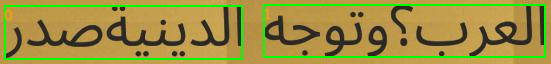

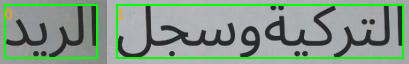

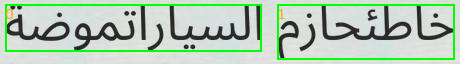

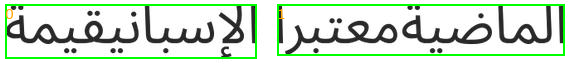

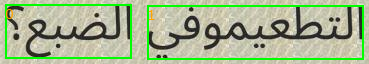

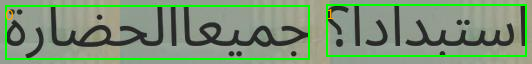

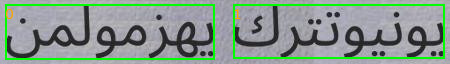

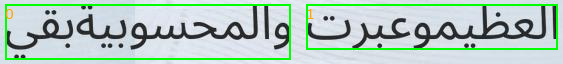

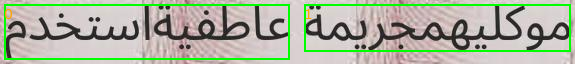

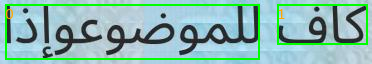

In [ ]:
import os
import numpy as np
import cv2
import imutils
from PIL import Image, ImageDraw, ImageFont, ImageColor
import gdown
import random
import glob
from pathlib import Path
from PIL import Image
from nb_utils.file_dir_handling import list_files


#image dirctory  where we want to save your resulted images  images 
output_dir = '/content/images/'
os.makedirs(output_dir, exist_ok=True)

input_dir = '/content/out-sample-word-level-bboxes'


def draw_boxes(image, bounds, color='lime', width=2, text_font_size=14, text_fill_color="orange", draw_text_idx=True):

    font_file = './fonts/Verdana.ttf'
    if not os.path.exists("./fonts"):
        os.makedirs("fonts", exist_ok=True)
        url = 'https://drive.google.com/uc?id=1a4Jyh3bwe6v6Hji1WaGgH-7nwA1YOHXb'
        
        gdown.download(url, font_file, quiet=False)

    font = ImageFont.truetype(font_file, text_font_size)
    
    auto_unique_color = False
    if color == "auto_unique":
        colors_list = list(ImageColor.colormap.values())
        auto_unique_color = True

    draw = ImageDraw.Draw(image)
    for idx, bound in enumerate(bounds):
      
        if auto_unique_color:
            color = random.choice(colors_list)
        # # print(bound)
        # if len(np.array(bound).shape) == 1: 
        #     ## rectangle
        #     xmin, xmax, ymin, ymax = bound
        #     draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=width)
        # else:
        #     # Polygon
        #     p0, p1, p2, p3 = bound
        #     draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
        xmin, xmax, ymin, ymax = bound
        draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=width)
          
        if draw_text_idx:
            text = f"{idx}"
            draw.text((xmin, ymin), text, font=font, align ="left", fill=text_fill_color) 
        
    return image

# using pillow to filter images in folder and and store path of images in list

if os.path.exists(input_dir):
    image_path_list = []
    # images = glob.glob(f"{input_dir}/*.jpg")
    images = list_files(input_dir, filter_ext=[".jpg", ".jpeg", ".png"])
    # print(f"images: ", images)
    print(f"Total images: ", len(images))

    for image in images:
        image_path_list.append(image)

    # using pillow to filter images in folder and and store path of images in list
    for image_path in image_path_list :
        p = Path(image_path)
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        boxes_txtfile = p.with_name(f"{p.stem}_boxes.txt")
      
        count = 0
        bounds = []
        with open(boxes_txtfile) as fp:
          Lines = fp.readlines()
          # Space also contain box leaving space by iterating by stepping 2 
          #  It will not draw boxes around space and skip the space.

          for line in Lines[::2]:
              line = line.strip().replace('\n','')
              line_splitted = line.split(" ")
              x, y, x2, y2 = [int(float(i)) for i in line_splitted]
              cordinates = [x, x2, y, y2 ]
              bounds.append(cordinates)
              count += 1
              # print("Line{}: {}".format(count, line))
            
        # this function call the visualize method to draw the boxes aound text
        draw_boxes(img_pil, bounds=bounds, color='lime', width=2, text_font_size=14, text_fill_color="orange", draw_text_idx=True)
        display(img_pil)
        img_pil.save(f"{output_dir}/{p.stem}.jpg")

else:
    print(f"Error.. Input folder {input_dir} not exists...")